In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import platform

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [3]:
from psutil import virtual_memory

ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


# Monthly

In [4]:
if platform.system() == 'Windows':
  pm10_monthly = pd.read_csv("..\\Data for model\\co_meteorolgical_monthly.csv")
elif platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/gdrive')
  pm10_monthly = pd.read_csv("/content/gdrive/Othercomputers/My Laptop (1)/jkt-aqi-forecasting/Model/Data for Model/co_meteorolgical_monthly.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## CO

In [5]:
co_monthly

,tanggal,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
0,2010-01-31,41.9,42,4.7,5,2372.3,30,51.0,22,21.8,14,27.4,80.2,14.4,2.5
1,2010-02-28,56.2,53,6.0,7,2825.5,36,97.1,41,28.7,19,28.2,80.3,9.6,2.6
2,2010-03-31,59.3,55,8.0,9,2897.4,36,101.1,42,29.2,19,28.6,78.5,9.4,2.6
3,2010-04-30,59.5,55,12.4,13,2720.0,34,118.3,49,27.1,18,29.6,74.5,2.2,2.7
4,2010-05-31,65.2,58,16.3,16,2907.7,37,124.3,52,31.1,20,29.3,76.7,2.8,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019-08-31,68.8,59,19.7,20,1680.0,22,143.1,60,25.3,16,28.3,68.8,0.0,1.4
116,2019-09-30,64.3,57,21.6,21,1523.2,20,140.4,59,22.5,15,28.8,68.9,0.0,1.2
117,2019-10-31,73.4,62,21.6,21,1540.0,20,159.5,67,23.6,15,29.5,70.0,0.0,1.2
118,2019-11-30,65.6,58,23.5,23,1363.2,18,162.7,69,24.0,16,29.5,70.8,2.0,1.3


In [6]:
co_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tanggal                         120 non-null    object 
 1   pm10(ug/m3)                     120 non-null    float64
 2   pm10_ispu                       120 non-null    int64  
 3   so2(ug/m3)                      120 non-null    float64
 4   so2_ispu                        120 non-null    int64  
 5   co(ug/m3)                       120 non-null    float64
 6   co_ispu                         120 non-null    int64  
 7   o3(ug/m3)                       120 non-null    float64
 8   o3_ispu                         120 non-null    int64  
 9   no2(ug/m3)                      120 non-null    float64
 10  no2_ispu                        120 non-null    int64  
 11  temperatur_rata-rata(°C)        120 non-null    float64
 12  kelembapan_rata-rata(%)         120 

In [7]:
co_monthly['tanggal'] = pd.to_datetime(co_monthly['tanggal'], dayfirst=True)
co_monthly.set_index('tanggal', inplace=True)

In [8]:
co_monthly.describe()

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.696667,53.766667,17.369167,17.350000,2140.963333,27.225000,123.872500,52.133333,20.342500,13.441667,28.484167,75.831667,5.907500,1.881667
std,14.937353,9.465313,9.064084,8.516568,458.311636,5.590301,40.796987,17.162071,10.281407,6.340209,0.658365,4.315148,5.617263,0.680457
min,28.400000,29.000000,1.600000,3.000000,1150.500000,15.000000,31.100000,14.000000,2.700000,3.000000,26.600000,66.300000,0.000000,0.900000
25%,50.250000,50.000000,9.000000,9.000000,1772.150000,23.000000,95.125000,40.000000,7.500000,5.750000,28.175000,72.750000,1.800000,1.300000
50%,59.450000,55.000000,16.850000,17.000000,2168.800000,27.500000,126.200000,52.500000,24.050000,16.000000,28.600000,76.300000,5.050000,1.600000
75%,70.500000,60.250000,23.075000,23.000000,2529.600000,32.000000,156.550000,66.000000,28.925000,19.000000,28.900000,78.600000,8.525000,2.600000
max,103.200000,77.000000,40.800000,39.000000,3062.400000,39.000000,203.900000,86.000000,37.500000,24.000000,29.900000,84.800000,33.000000,3.300000


In [9]:
co_monthly.corr(method='spearman')

,pm10(ug/m3),pm10_ispu,so2(ug/m3),so2_ispu,co(ug/m3),co_ispu,o3(ug/m3),o3_ispu,no2(ug/m3),no2_ispu,temperatur_rata-rata(°C),kelembapan_rata-rata(%),curah_hujan(mm),kecepatan_angin_rata-rata(m/s)
pm10(ug/m3),1.000000,0.998846,0.073242,0.066274,0.217009,0.214419,0.320464,0.323119,0.506270,0.496773,0.337487,-0.365542,-0.457840,-0.117375
pm10_ispu,0.998846,1.000000,0.077028,0.070341,0.217985,0.215218,0.318720,0.321275,0.500334,0.491054,0.337593,-0.359719,-0.450833,-0.118786
so2(ug/m3),0.073242,0.077028,1.000000,0.998928,-0.111072,-0.105254,-0.053265,-0.049911,-0.151968,-0.145419,0.141579,-0.234168,-0.149000,-0.087005
so2_ispu,0.066274,0.070341,0.998928,1.000000,-0.105754,-0.099560,-0.061366,-0.058153,-0.151439,-0.145055,0.137976,-0.227800,-0.139096,-0.082798
co(ug/m3),0.217009,0.217985,-0.111072,-0.105754,1.000000,0.998476,0.213741,0.212842,0.474615,0.480847,-0.105411,0.360797,0.340931,0.460545
co_ispu,0.214419,0.215218,-0.105254,-0.099560,0.998476,1.000000,0.210402,0.209816,0.473710,0.480386,-0.107821,0.362407,0.341291,0.457511
o3(ug/m3),0.320464,0.318720,-0.053265,-0.061366,0.213741,0.210402,1.000000,0.999715,0.457211,0.452113,0.314346,-0.331460,-0.274015,0.319836
o3_ispu,0.323119,0.321275,-0.049911,-0.058153,0.212842,0.209816,0.999715,1.000000,0.458917,0.454162,0.314866,-0.331565,-0.275958,0.316290
no2(ug/m3),0.506270,0.500334,-0.151968,-0.151439,0.474615,0.473710,0.457211,0.458917,1.000000,0.995838,0.260025,-0.250964,-0.261007,0.344120
no2_ispu,0.496773,0.491054,-0.145419,-0.145055,0.480847,0.480386,0.452113,0.454162,0.995838,1.000000,0.255304,-0.240835,-0.250228,0.345154


In [10]:
co_monthly.drop(['pm10_ispu', 'so2(ug/m3)', 'so2_ispu', 'co_ispu', 'o3_ispu', 'no2_ispu', 'temperatur_rata-rata(°C)'], axis=1, inplace=True)
first_column = co_monthly.pop('co(ug/m3)')
co_monthly.insert(0, 'co(ug/m3)', first_column)

### Visualize

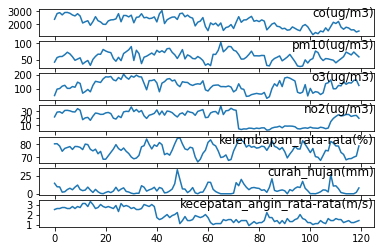

In [11]:
groups = [i for  i in range(len(co_monthly.columns))]
i = 1
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(co_monthly.values[:, group])
    plt.title(co_monthly.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

### Sliding Window

In [12]:
WINDOW_SIZE = 12
FEATURES = co_monthly.shape[1]

# convert series to supervised learning
def series_to_supervised(index, data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg.index = index
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
values = co_monthly.values
# frame as supervised learning
reframed = series_to_supervised(co_monthly.index, values, WINDOW_SIZE)
# drop columns we don't want to predict
reframed = reframed.iloc[:, :-1*(FEATURES-1)]
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var1(t-11),var2(t-11),var3(t-11),...,var6(t-2),var7(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,,,
2011-01-31,2372.3,41.9,51.0,21.8,80.2,14.4,2.5,2825.5,56.2,97.1,...,5.9,2.7,2077.2,36.0,67.8,17.8,75.8,4.3,3.1,2176.7
2011-02-28,2825.5,56.2,97.1,28.7,80.3,9.6,2.6,2897.4,59.3,101.1,...,4.3,3.1,2176.7,42.2,79.6,20.4,80.0,5.1,3.1,2256.0
2011-03-31,2897.4,59.3,101.1,29.2,78.5,9.4,2.6,2720.0,59.5,118.3,...,5.1,3.1,2256.0,47.0,94.6,21.1,79.6,9.1,2.8,1889.7
2011-04-30,2720.0,59.5,118.3,27.1,74.5,2.2,2.7,2907.7,65.2,124.3,...,9.1,2.8,1889.7,31.9,77.6,16.9,76.0,5.1,3.3,2186.7
2011-05-31,2907.7,65.2,124.3,31.1,76.7,2.8,2.7,2916.0,72.6,102.4,...,5.1,3.3,2186.7,50.4,123.9,22.8,74.8,1.8,3.0,2579.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1229.3,71.7,74.8,5.3,69.9,1.1,1.1,1440.0,55.3,58.3,...,0.8,1.2,1741.5,73.2,131.7,25.3,67.9,0.0,1.3,1680.0
2019-09-30,1440.0,55.3,58.3,6.9,67.5,2.7,1.4,1373.3,46.9,69.8,...,0.0,1.3,1680.0,68.8,143.1,25.3,68.8,0.0,1.4,1523.2
2019-10-31,1373.3,46.9,69.8,6.2,71.3,5.3,1.2,1691.4,53.0,136.2,...,0.0,1.4,1523.2,64.3,140.4,22.5,68.9,0.0,1.2,1540.0


In [13]:
from sklearn.preprocessing import MinMaxScaler

# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
reframed = pd.DataFrame(scaler.fit_transform(reframed), index=reframed.index, columns=reframed.columns)
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var1(t-11),var2(t-11),var3(t-11),...,var6(t-2),var7(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
tanggal,,,,,,,,,,,,,,,,,,,,,
2011-01-31,0.639050,0.180481,0.115162,0.548851,0.751351,0.436364,0.666667,0.876092,0.371658,0.381944,...,0.178788,0.750000,0.484701,0.101604,0.212384,0.433908,0.513514,0.130303,0.916667,0.536744
2011-02-28,0.876092,0.371658,0.381944,0.747126,0.756757,0.290909,0.708333,0.913698,0.413102,0.405093,...,0.130303,0.916667,0.536744,0.184492,0.280671,0.508621,0.740541,0.154545,0.916667,0.578221
2011-03-31,0.913698,0.413102,0.405093,0.761494,0.659459,0.284848,0.708333,0.820911,0.415775,0.504630,...,0.154545,0.916667,0.578221,0.248663,0.367477,0.528736,0.718919,0.275758,0.791667,0.386631
2011-04-30,0.820911,0.415775,0.504630,0.701149,0.443243,0.066667,0.750000,0.919086,0.491979,0.539352,...,0.275758,0.791667,0.386631,0.046791,0.269097,0.408046,0.524324,0.154545,1.000000,0.541974
2011-05-31,0.919086,0.491979,0.539352,0.816092,0.562162,0.084848,0.750000,0.923427,0.590909,0.412616,...,0.154545,1.000000,0.541974,0.294118,0.537037,0.577586,0.459459,0.054545,0.875000,0.747267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.041216,0.578877,0.252894,0.074713,0.194595,0.033333,0.083333,0.151420,0.359626,0.157407,...,0.024242,0.125000,0.309117,0.598930,0.582176,0.649425,0.086486,0.000000,0.166667,0.276950
2019-09-30,0.151420,0.359626,0.157407,0.120690,0.064865,0.081818,0.208333,0.116533,0.247326,0.223958,...,0.000000,0.166667,0.276950,0.540107,0.648148,0.649425,0.135135,0.000000,0.208333,0.194937
2019-10-31,0.116533,0.247326,0.223958,0.100575,0.270270,0.160606,0.125000,0.282912,0.328877,0.608218,...,0.000000,0.208333,0.194937,0.479947,0.632523,0.568966,0.140541,0.000000,0.125000,0.203724


In [14]:
from datetime import datetime

train_end = datetime.strptime('2018-12-31', '%Y-%m-%d')
test_start = datetime.strptime('2019-01-01', '%Y-%m-%d')
test_end = datetime.strptime('2019-12-31', '%Y-%m-%d')

train = reframed.loc[:train_end].values
test = reframed.loc[test_start:test_end].values
train_X, train_y = train[:, :-1], train[:, -1:]
test_X, test_y = test[:, :-1], test[:, -1:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(96, 84) (96, 1) (12, 84) (12, 1)


In [15]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], WINDOW_SIZE, FEATURES))
# val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], WINDOW_SIZE, FEATURES))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(96, 12, 7) (96, 1) (12, 12, 7) (12, 1)


In [16]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed
import keras_tuner as kt

set_seed(
    1337
)

'''# design network
model = Sequential()
model.add(InputLayer((train_X.shape[1], train_X.shape[2])))
model.add(LSTM(6))
model.add(Dense(1))
model.compile(loss=Huber(), optimizer=Adam(learning_rate=0.001), metrics=RootMeanSquaredError())
# fit network
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=24)
history = model.fit(train_X, train_y, epochs=175, batch_size=24, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()'''
def call_existing_code(num_layers, units, activation, dropout, dropout_rate, lr):
    model = Sequential()
    model.add(InputLayer((train_X.shape[1], train_X.shape[2])))
    for i in range(num_layers):
      model.add(LSTM(units=units[i], return_sequences=True))
    model.add(LSTM(units=units[-1]))
    if dropout:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1, activation=activation))
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=Huber(),
        metrics=RootMeanSquaredError(),
    )
    return model


def build_model(hp):
    num_layers = hp.Int("num_layers", min_value=1, max_value=3)
    units_i = []
    for i in range(num_layers):
      units_i.append(hp.Int(f"units_{i}", min_value=8, max_value=512, step=8))
    units_i.append(hp.Int("units", min_value=8, max_value=128, step=8))
    activation = hp.Choice("activation", ["relu", "tanh", "linear"])
    dropout = hp.Boolean("dropout")
    dropout_rate = hp.Float("dropout_1", min_value=0.1, max_value=0.2, step=0.1)
    lr = hp.Float("lr", min_value=1e-3, max_value=1e-2, default=1e-2)
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        num_layers=num_layers, units=units_i, activation=activation, dropout=dropout, dropout_rate=dropout_rate, lr=lr
    )
    return model


build_model(kt.HyperParameters())

In [18]:
class MyTuner(kt.tuners.BayesianOptimization):
    def run_trial(self, trial, *args, **kwargs):
        # You can add additional HyperParameters for preprocessing and custom training loops
        # via overriding `run_trial`
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', min_value=1, max_value=60, step=1)
        kwargs['epochs'] = trial.hyperparameters.Int('epochs', min_value=1, max_value=500, step=1)
        return super(MyTuner, self).run_trial(trial, *args, **kwargs)

if platform.system() == 'Windows':
  tuner = MyTuner(
    hypermodel=build_model,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=100,
    executions_per_trial=1,
    overwrite=False,
    directory="D:\\From External Drive\\Kuliah\\Tugas Akhir\\undergraduate-thesis_2.0\\data-and-model\\Model_2",
    project_name="lstm_co_monthly_80-20_result"
  )
elif platform.system() == 'Linux':
  tuner = MyTuner(
    hypermodel=build_model,
    objective=kt.Objective("val_root_mean_squared_error", direction="min"),
    max_trials=100,
    executions_per_trial=1,
    overwrite=False,
    directory="/content/gdrive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model_2",
    project_name="lstm_co_monthly_80-20_result"
  )

tuner.search(x=train_X, y=train_y, validation_data=(test_X, test_y), shuffle=False)

In [19]:
tuner.results_summary()

Results summary
Results in /content/gdrive/Othercomputers/My Laptop (1)/undergraduate-thesis_2.0/data-and-model/Model_2/lstm_co_monthly_80-20_result
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 1
units_0: 8
units: 128
activation: linear
dropout: False
dropout_1: 0.2
lr: 0.001
batch_size: 60
epochs: 500
units_1: 8
units_2: 8
Score: 0.08890662342309952
Trial summary
Hyperparameters:
num_layers: 2
units_0: 8
units: 128
activation: linear
dropout: False
dropout_1: 0.1
lr: 0.010000000000000002
batch_size: 60
epochs: 500
units_1: 8
units_2: 8
Score: 0.09179099649190903
Trial summary
Hyperparameters:
num_layers: 1
units_0: 512
units: 128
activation: linear
dropout: True
dropout_1: 0.1
lr: 0.001
batch_size: 1
epochs: 500
units_1: 8
units_2: 512
Score: 0.09564095735549927
Trial summary
Hyperparameters:
num_layers: 1
units_0: 8
units: 128
activation: linear
dropout: False
dropout_1: 0.2
lr: 0.010000000000000002
batch_size: 60
epochs: 500
units_1: 8
units_2: 512
Score: 0.0967

In [20]:
# Get the top 2 models.
best_model = tuner.get_best_models(num_models=1)[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=((train_X.shape[1], train_X.shape[2])))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 8)             512       
                                                                 
 lstm_1 (LSTM)               (None, 128)               70144     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 70,785
Trainable params: 70,785
Non-trainable params: 0
_________________________________________________________________


In [21]:
best_model.evaluate(test_X, test_y)

1/1 [==============================] - 1s 1s/step - loss: 0.0032 - root_mean_squared_error: 0.0803


[0.003226185915991664, 0.08032665401697159]

In [22]:
# best_hp = tuner.get_best_hyperparameters(10)[0]
# best_model = build_model(best_hp)
# best_model.fit(x=train_X, y=train_y, validation_data=(test_X, test_y), epochs=500, batch_size=60, shuffle=False)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
  
# make a prediction
yhat = best_model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1]*train_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, train_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_y = np.concatenate((train_y, train_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Train R-Squared: {r2_score(inv_y, inv_yhat) * 100:.3f}%')
print(f'Train RMSE: {rmse:.3f}')
print(f'Train MAPE: {mape(inv_y, inv_yhat):.3f}%')

3/3 [==============================] - 1s 14ms/step
Train R-Squared: 72.366%
Train RMSE: 226.154
Train MAPE: 8.579%


In [24]:
train_result = pd.DataFrame({'train_actual': inv_y, 'train_pred': inv_yhat}, index=reframed.loc[:train_end].index)
train_result

,train_actual,train_pred
tanggal,,
2011-01-31,2176.7,2076.387392
2011-02-28,2256.0,2155.693127
2011-03-31,1889.7,2169.012780
2011-04-30,2186.7,2160.099888
2011-05-31,2579.2,2131.088429
...,...,...
2018-08-31,1229.3,1271.408070
2018-09-30,1440.0,1251.924586
2018-10-31,1373.3,1302.239667


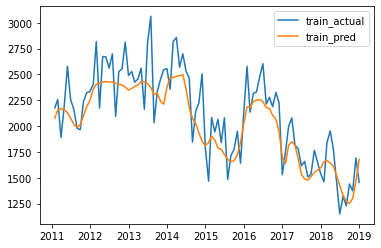

In [25]:
plt.plot(train_result['train_actual'], label='train_actual')
plt.plot(train_result['train_pred'], label='train_pred')
plt.legend()
plt.show()

In [26]:
# make a prediction
yhat = best_model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = mean_squared_error(inv_y, inv_yhat, squared=False)
print(f'Test R-Squared: {round(r2_score(inv_y, inv_yhat) * 100, 2)}%')
print(f'Test RMSE: {round(rmse, 2)}')
print(f'Test MAPE: {round(mape(inv_y, inv_yhat), 2)}%')

1/1 [==============================] - 1s 915ms/step
Test R-Squared: 64.84%
Test RMSE: 153.58
Test MAPE: 7.38%


In [27]:
result = pd.DataFrame({'actual': inv_y, 'pred': inv_yhat}, index=reframed.loc[test_start:test_end].index)

In [28]:
rmse_each_month = []
for index, value in result.iterrows():
    rmse_each_month.append(round(mean_squared_error([value['actual']], [value['pred']], squared=False), 2))
result['rmse'] = rmse_each_month

In [29]:
mape_each_month = []
for index, value in result.iterrows():
    mape_each_month.append(f"{round(mape([value['actual']], [value['pred']]), 2)}%")
result['mape'] = mape_each_month

In [30]:
result

,actual,pred,rmse,mape
tanggal,,,,
2019-01-31,1800.0,1822.366309,22.37,1.24%
2019-02-28,2133.3,1970.795963,162.50,7.62%
2019-03-31,2037.3,1933.080953,104.22,5.12%
2019-04-30,2200.0,1982.915352,217.08,9.87%
2019-05-31,1751.4,1864.019312,112.62,6.43%
2019-06-30,1582.9,1877.565115,294.67,18.62%
2019-07-31,1741.5,1713.563426,27.94,1.6%
2019-08-31,1680.0,1617.471147,62.53,3.72%
2019-09-30,1523.2,1554.574099,31.37,2.06%


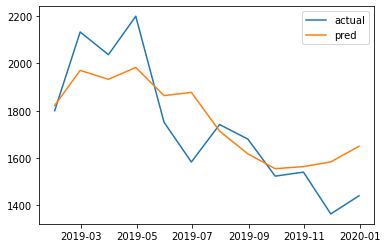

In [31]:
plt.plot(result['actual'], label='actual')
plt.plot(result['pred'], label='pred')
plt.legend()
plt.show()